keep the viusalization encoding separate from the encoding 
used to solve the Problem 


in the encoding: 
used to solve the Problem.
include choices.

in the visualization encoding:
can include rules but no choices




In Answer set programming (ASP) syntax using clingo, the statement "1{person(a);person(b)}1" represents a cardinality constraint, indicating exactly one of the atoms "person(a)" or "perosn(b)" must be true(the"1"before and after the curly braces)

In [1]:
%%file encoding.lp
1{person(a);person(b)}1.

Overwriting encoding.lp


In [2]:
%%file viz.lp
node(X):-person(X). 
attr(node, a,color,blue):-node(a).
attr(node,b,color,red):-node(b).

Overwriting viz.lp


Routing Energy: energy consumption associated with transmission and routing of data packets in a computer network. 

The static power is the power of the processor when it is not active 

# Visualize the answer sets.
represents the bindings of tasks to processors based on the answer sets

In [3]:
!ls
!ls asp-based-visualization 

color	     encodings	out   __pycache__  src		  test3.lp  viz.lp
encoding.lp  instances	out2  README.md    summary.ipynb  test.lp


ls: Zugriff auf 'asp-based-visualization' nicht möglich: Datei oder Verzeichnis nicht gefunden


In [5]:
!clingo instances/test.lp encodings/encoding_binding.lp 0

clingo version 5.4.1
Reading from instances/test.lp ...
Solving...
Answer: 1
bind(m1x2,t1,p2) bind(m2x2,t2,p3) bind(m3x4,t3,p4) bind(m4x4,t4,p4) bind(m5x3,t5,p3)
Answer: 2
bind(m1x2,t1,p2) bind(m2x2,t2,p3) bind(m3x4,t3,p4) bind(m4x4,t4,p4) bind(m5x1,t5,p1)
Answer: 3
bind(m1x2,t1,p2) bind(m2x2,t2,p3) bind(m3x4,t3,p4) bind(m4x4,t4,p4) bind(m5x2,t5,p2)
Answer: 4
bind(m1x1,t1,p1) bind(m2x2,t2,p3) bind(m3x4,t3,p4) bind(m4x4,t4,p4) bind(m5x3,t5,p3)
Answer: 5
bind(m1x1,t1,p1) bind(m2x2,t2,p3) bind(m3x4,t3,p4) bind(m4x4,t4,p4) bind(m5x1,t5,p1)
Answer: 6
bind(m1x1,t1,p1) bind(m2x2,t2,p3) bind(m3x4,t3,p4) bind(m4x4,t4,p4) bind(m5x2,t5,p2)
SATISFIABLE

Models       : 6
Calls        : 1
Time         : 0.001s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)
CPU Time     : 0.001s


Visualizing Answer Set 1: ['bind(m1x2,t1,p2)', 'bind(m2x2,t2,p3)', 'bind(m3x4,t3,p4)', 'bind(m4x4,t4,p4)', 'bind(m5x3,t5,p3)']


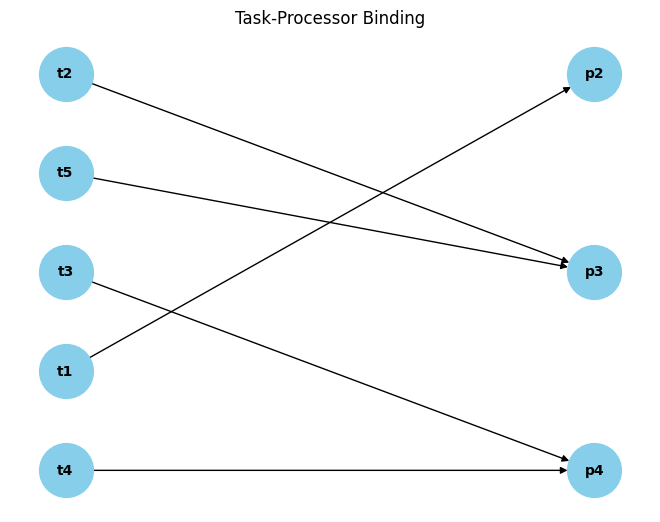

Visualizing Answer Set 2: ['bind(m1x2,t1,p2)', 'bind(m2x2,t2,p3)', 'bind(m3x4,t3,p4)', 'bind(m4x4,t4,p4)', 'bind(m5x1,t5,p1)']


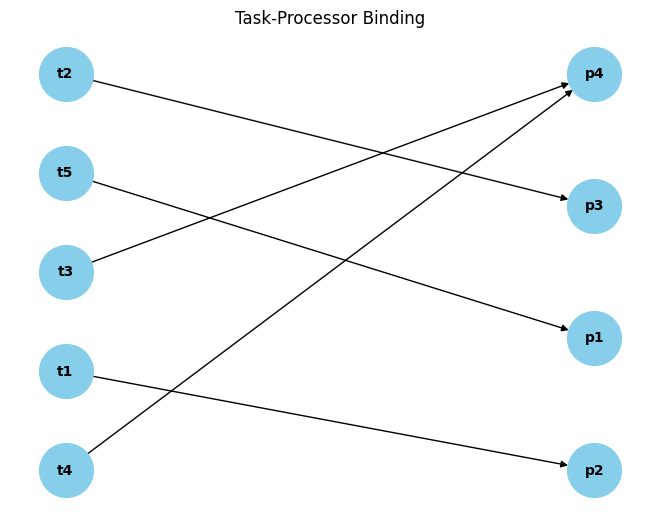

Visualizing Answer Set 3: ['bind(m1x2,t1,p2)', 'bind(m2x2,t2,p3)', 'bind(m3x4,t3,p4)', 'bind(m4x4,t4,p4)', 'bind(m5x2,t5,p2)']


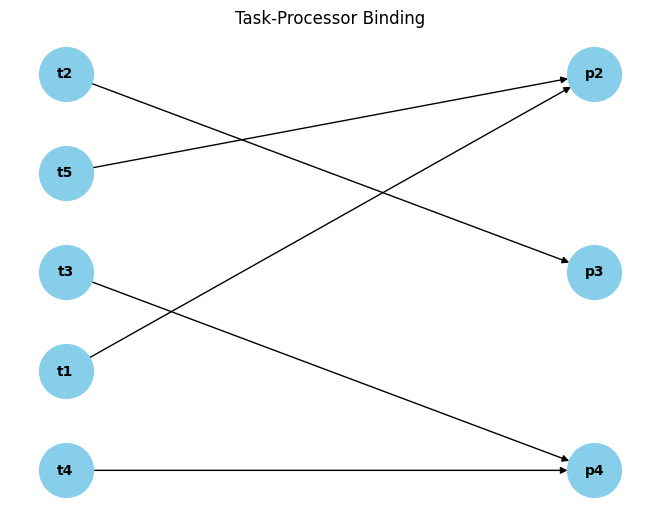

Visualizing Answer Set 4: ['bind(m1x1,t1,p1)', ' bind(m2x2,t2,p3)', ' bind(m3x4,t3,p4)', 'bind(m4x4,t4,p4)', 'bind(m5x3,t5,p3)']


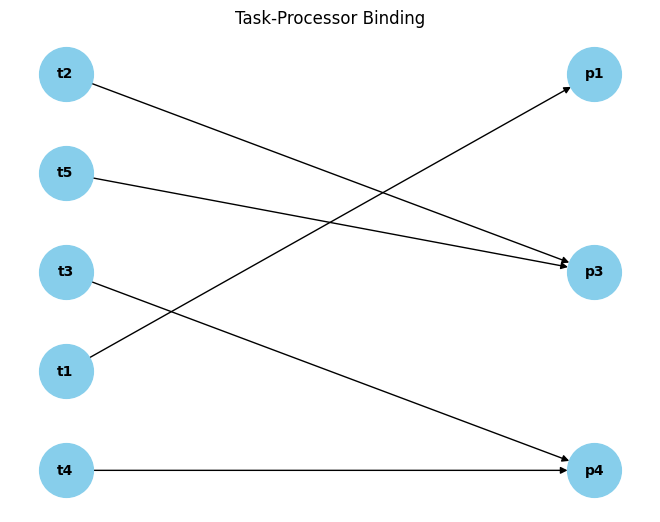

Visualizing Answer Set 5: ['bind(m1x1,t1,p1)', ' bind(m2x2,t2,p3)', 'bind(m3x4,t3,p4)', ' bind(m4x4,t4,p4)', ' bind(m5x1,t5,p1)']


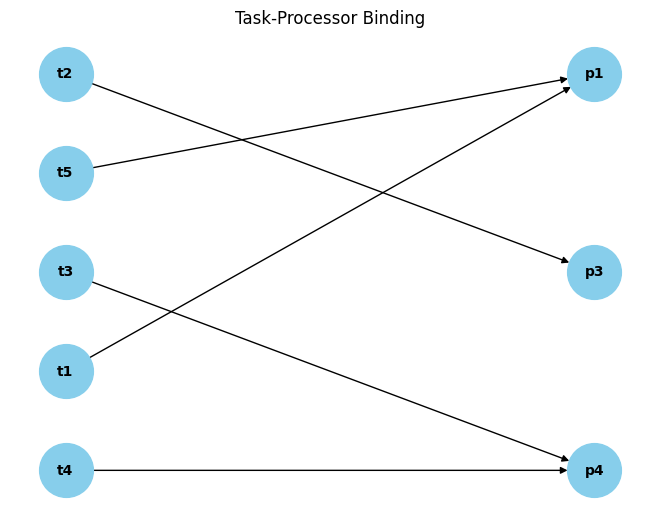

Visualizing Answer Set 6: ['bind(m1x1,t1,p1)', 'bind(m2x2,t2,p3)', 'bind(m3x4,t3,p4)', 'bind(m4x4,t4,p4)', ' bind(m5x2,t5,p2)']


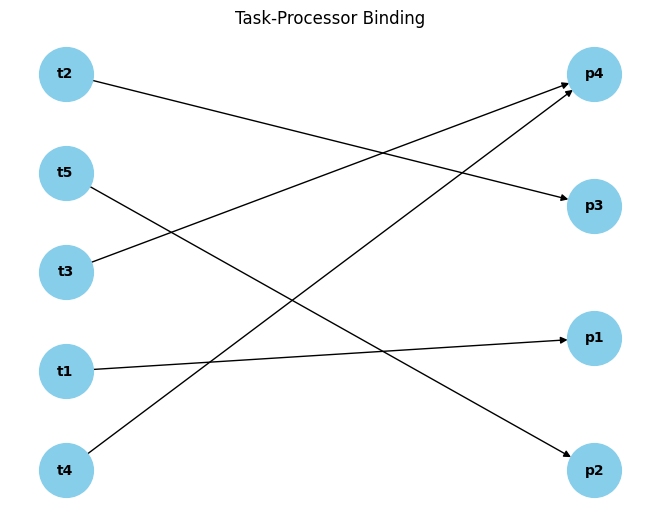

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_answer_set(answer_set):
    G = nx.DiGraph()

    # Add nodes for processors
    processors = set()
    for bind in answer_set:
        _, _, processor = bind.split('(')[1].split(')')[0].split(',')
        processors.add(processor)
    G.add_nodes_from(processors, bipartite=0)

    # Add nodes for tasks
    tasks = set()
    for bind in answer_set:
        _, task, _ = bind.split('(')[1].split(')')[0].split(',')
        tasks.add(task)
    G.add_nodes_from(tasks, bipartite=1)

    # Add edges for bindings
    for bind in answer_set:
        _, task, processor = bind.split('(')[1].split(')')[0].split(',')
        G.add_edge(task, processor)

    pos = nx.bipartite_layout(G, tasks)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
    plt.title('Task-Processor Binding')
    plt.show()

# Answer sets
answer_sets = [
    ['bind(m1x2,t1,p2)', 'bind(m2x2,t2,p3)', 'bind(m3x4,t3,p4)', 'bind(m4x4,t4,p4)', 'bind(m5x3,t5,p3)'],
    ['bind(m1x2,t1,p2)', 'bind(m2x2,t2,p3)', 'bind(m3x4,t3,p4)', 'bind(m4x4,t4,p4)', 'bind(m5x1,t5,p1)'],
    ['bind(m1x2,t1,p2)', 'bind(m2x2,t2,p3)', 'bind(m3x4,t3,p4)', 'bind(m4x4,t4,p4)' ,'bind(m5x2,t5,p2)'],
    ['bind(m1x1,t1,p1)',' bind(m2x2,t2,p3)',' bind(m3x4,t3,p4)' , 'bind(m4x4,t4,p4)', 'bind(m5x3,t5,p3)'],
    ['bind(m1x1,t1,p1)',' bind(m2x2,t2,p3)','bind(m3x4,t3,p4)',' bind(m4x4,t4,p4)',' bind(m5x1,t5,p1)'],
    ['bind(m1x1,t1,p1)', 'bind(m2x2,t2,p3)', 'bind(m3x4,t3,p4)','bind(m4x4,t4,p4)',' bind(m5x2,t5,p2)']
]

# Visualize each answer set
for i, answer_set in enumerate(answer_sets, start=1):
    print(f"Visualizing Answer Set {i}: {answer_set}")
    visualize_answer_set(answer_set)


In [7]:
!clingo instances/test.lp encodings/encoding_binding.lp encodings/encoding_routing_hop_arb.lp 0

clingo version 5.4.1
Reading from instances/test.lp ...
Solving...
Answer: 1
nr_links(16) reached(c1,l16,r1,r4) reached(c2,l16,r1,r4) reached(c2,l13,r2,r1) reached(c1,l3,r3,p3) reached(c2,l14,r3,r2) reached(c3,l3,r3,p3) reached(c1,l15,r4,r3) reached(c2,l4,r4,p4) reached(c3,l15,r4,r3) reached(c1,l9,p1,r1) reached(c2,l11,p3,r3) reached(c3,l12,p4,r4) bind(m1x1,t1,p1) bind(m2x2,t2,p3) bind(m3x4,t3,p4) bind(m4x4,t4,p4) bind(m5x3,t5,p3) allocated(p1) allocated(p3) allocated(p4) allocated(l16) allocated(l13) allocated(l3) allocated(l14) allocated(l4) allocated(l15) allocated(l9) allocated(l11) allocated(l12) allocated(r2) allocated(r4) allocated(r3) allocated(r1)
Answer: 2
nr_links(16) reached(c1,l16,r1,r4) reached(c1,l3,r3,p3) reached(c2,l7,r3,r4) reached(c3,l3,r3,p3) reached(c1,l15,r4,r3) reached(c2,l4,r4,p4) reached(c3,l15,r4,r3) reached(c1,l9,p1,r1) reached(c2,l11,p3,r3) reached(c3,l12,p4,r4) bind(m1x1,t1,p1) bind(m2x2,t2,p3) bind(m3x4,t3,p4) bind(m4x4,t4,p4) bind(m5x3,t5,p3) allocated(p1

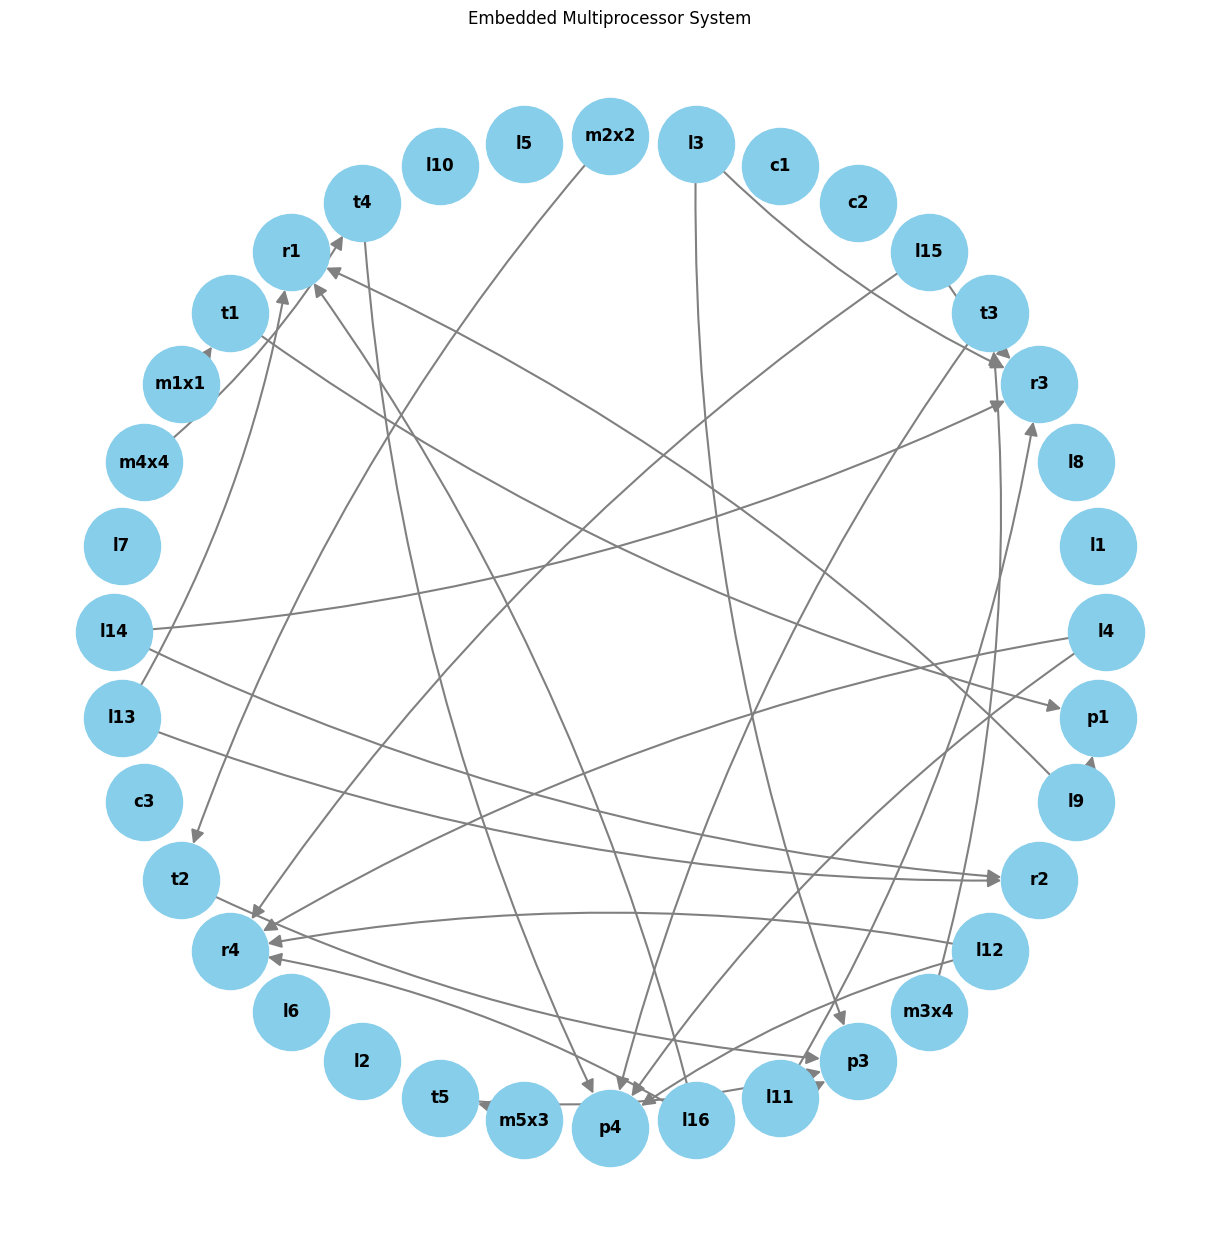

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

def parse_answer_set(answer_set):
    facts = answer_set.split(" ")
    nodes = set()
    edges = []

    for fact in facts:
        fact_parts = fact.split("(")
        predicate = fact_parts[0]
        args = fact_parts[1].split(")")[0].split(",")

        if predicate == "nr_links":
            links = int(args[0])
            for i in range(1, links + 1):
                nodes.add("l{}".format(i))
        elif predicate == "reached":
            node, link, *resources = args
            nodes.add(node)
            nodes.add(link)
            for resource in resources:
                nodes.add(resource)
                edges.append((link, resource))
        elif predicate == "bind":
            mem_unit, task, processor = args
            nodes.add(mem_unit)
            nodes.add(task)
            nodes.add(processor)
            edges.append((mem_unit, task))
            edges.append((task, processor))
        elif predicate == "allocated":
            resource = args[0]
            nodes.add(resource)

    return nodes, edges

def visualize_system(nodes, edges):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    plt.figure(figsize=(12, 12))
    pos = nx.circular_layout(G)  # Circular layout for better node separation
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=3000, font_size=12, font_weight='bold', arrowsize=20, connectionstyle='arc3,rad=0.1', edge_color='gray', width=1.5)
    plt.title('Embedded Multiprocessor System')
    plt.show()

# Provided answer set
answer_set = "nr_links(16) reached(c1,l16,r1,r4) reached(c2,l16,r1,r4) reached(c2,l13,r2,r1) reached(c1,l3,r3,p3) reached(c2,l14,r3,r2) reached(c3,l3,r3,p3) reached(c1,l15,r4,r3) reached(c2,l4,r4,p4) reached(c3,l15,r4,r3) reached(c1,l9,p1,r1) reached(c2,l11,p3,r3) reached(c3,l12,p4,r4) bind(m1x1,t1,p1) bind(m2x2,t2,p3) bind(m3x4,t3,p4) bind(m4x4,t4,p4) bind(m5x3,t5,p3) allocated(p1) allocated(p3) allocated(p4) allocated(l16) allocated(l13) allocated(l3) allocated(l14) allocated(l4) allocated(l15) allocated(l9) allocated(l11) allocated(l12) allocated(r2) allocated(r4) allocated(r3) allocated(r1)"

nodes, edges = parse_answer_set(answer_set)
visualize_system(nodes, edges)


In [19]:
!python3 src/dseApp.py instances/test.lp encodings/encoding_binding.lp encodings/encoding_routing_hop_arb.lp encodings/encoding_scheduling.lp encodings/priorities.lp encodings/preferences.lp

Design Space Exploration with ASPmDL version 1.0
Reading from instances/test.lp ...
Solving...
Answer: 1
nr_links(16) dl(c1,13) dl(t2,17) dl(c2,19) dl(t3,24) dl(c3,2) dl(t5,5) dl(t1,9) dl(t4,0) pref(latency,max,27) pref(energy,sum,553) pref(cost,sum,180) reached(c1,l16,r1,r4) reached(c2,l16,r1,r4) reached(c3,l1,r1,p1) reached(c2,l13,r2,r1) reached(c1,l3,r3,p3) reached(c2,l14,r3,r2) reached(c1,l15,r4,r3) reached(c2,l4,r4,p4) reached(c3,l8,r4,r1) reached(c1,l9,p1,r1) reached(c2,l11,p3,r3) reached(c3,l12,p4,r4) bind(m1x1,t1,p1) bind(m2x2,t2,p3) bind(m3x4,t3,p4) bind(m4x4,t4,p4) bind(m5x1,t5,p1) allocated(p1) allocated(p3) allocated(p4) allocated(l1) allocated(l16) allocated(l13) allocated(l3) allocated(l14) allocated(l4) allocated(l8) allocated(l15) allocated(l9) allocated(l11) allocated(l12) allocated(r2) allocated(r4) allocated(r3) allocated(r1)
Answer: 2
nr_links(16) dl(c1,4) dl(t2,8) dl(c2,10) dl(t3,15) dl(c3,2) dl(t5,5) dl(t1,0) dl(t4,0) pref(latency,max,18) pref(energy,sum,553) pref

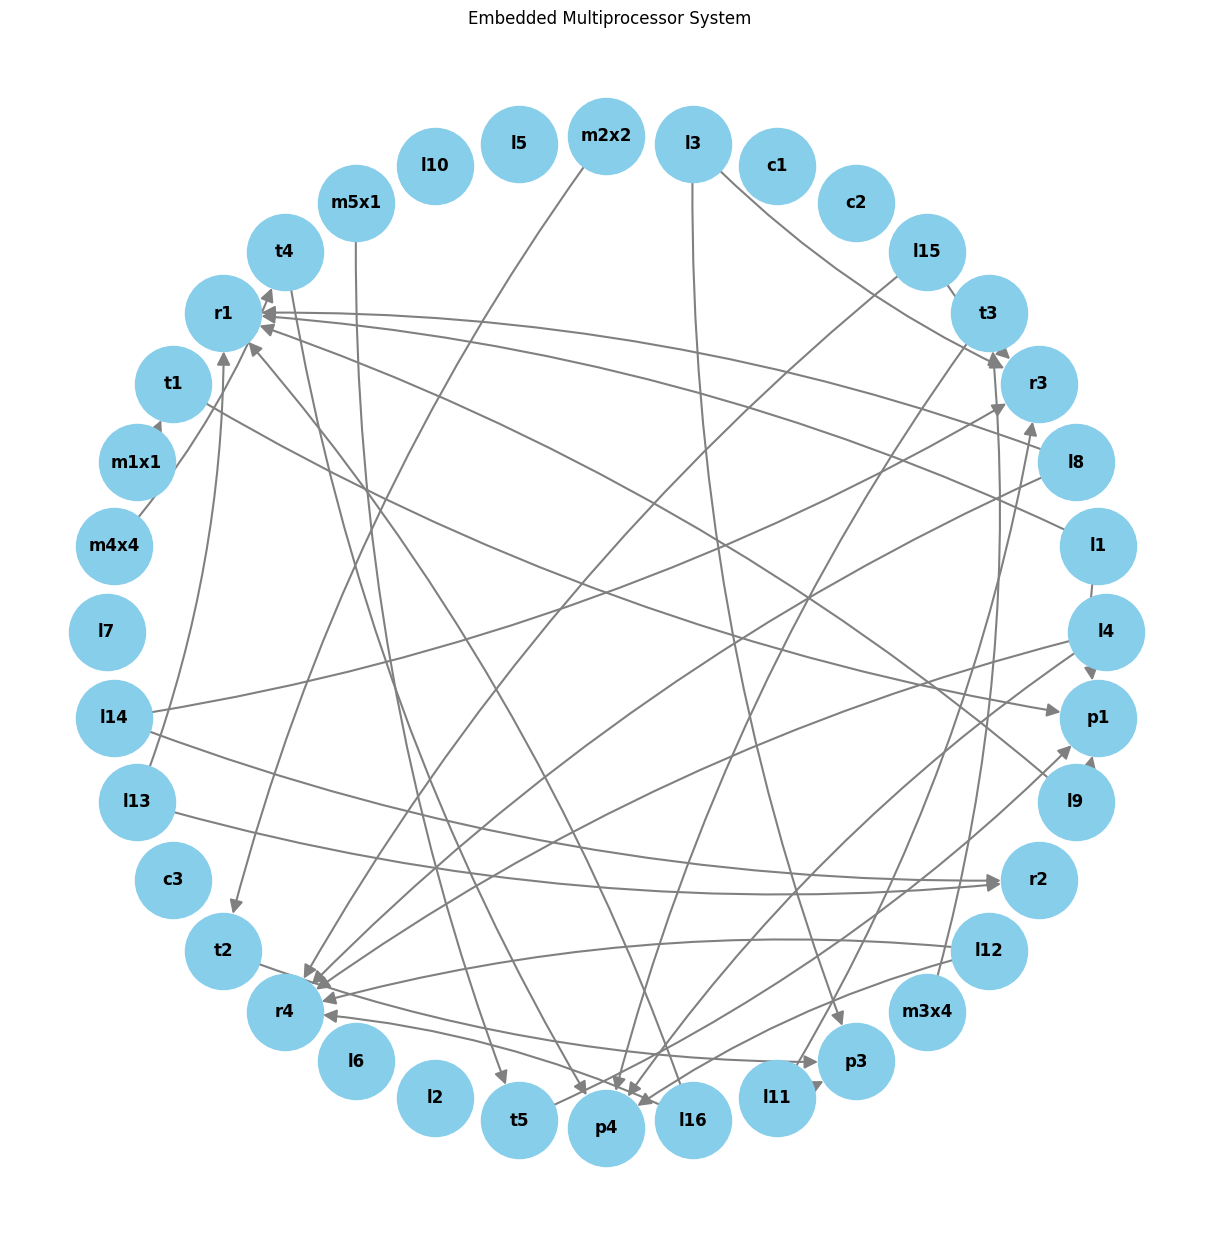

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

def parse_answer_set(answer_set):
    facts = answer_set.split(" ")
    nodes = set()
    edges = []

    for fact in facts:
        fact_parts = fact.split("(")
        predicate = fact_parts[0]
        args = fact_parts[1].split(")")[0].split(",")

        if predicate == "nr_links":
            links = int(args[0])
            for i in range(1, links + 1):
                nodes.add("l{}".format(i))
        elif predicate == "reached":
            node, link, *resources = args
            nodes.add(node)
            nodes.add(link)
            for resource in resources:
                nodes.add(resource)
                edges.append((link, resource))
        elif predicate == "bind":
            mem_unit, task, processor = args
            nodes.add(mem_unit)
            nodes.add(task)
            nodes.add(processor)
            edges.append((mem_unit, task))
            edges.append((task, processor))
        elif predicate == "allocated":
            resource = args[0]
            nodes.add(resource)

    return nodes, edges

def visualize_system(nodes, edges):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    plt.figure(figsize=(12, 12))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=3000, font_size=12, font_weight='bold', arrowsize=20, connectionstyle='arc3,rad=0.1', edge_color='gray', width=1.5)
    plt.title('Embedded Multiprocessor System')
    plt.show()

# New answer set
new_answer_set = "nr_links(16) dl(c1,13) dl(t2,17) dl(c2,19) dl(t3,24) dl(c3,2) dl(t5,5) dl(t1,9) dl(t4,0) pref(latency,max,27) pref(energy,sum,553) pref(cost,sum,180) reached(c1,l16,r1,r4) reached(c2,l16,r1,r4) reached(c3,l1,r1,p1) reached(c2,l13,r2,r1) reached(c1,l3,r3,p3) reached(c2,l14,r3,r2) reached(c1,l15,r4,r3) reached(c2,l4,r4,p4) reached(c3,l8,r4,r1) reached(c1,l9,p1,r1) reached(c2,l11,p3,r3) reached(c3,l12,p4,r4) bind(m1x1,t1,p1) bind(m2x2,t2,p3) bind(m3x4,t3,p4) bind(m4x4,t4,p4) bind(m5x1,t5,p1) allocated(p1) allocated(p3) allocated(p4) allocated(l1) allocated(l16) allocated(l13) allocated(l3) allocated(l14) allocated(l4) allocated(l8) allocated(l15) allocated(l9) allocated(l11) allocated(l12) allocated(r2) allocated(r4) allocated(r3) allocated(r1)"

nodes, edges = parse_answer_set(new_answer_set)
visualize_system(nodes, edges)
